In [1]:
import pandas as pd

df = pd.read_csv("../data/melb_data.csv")

df = df.drop(columns=["Address", "SellerG", "Date", "Postcode", "BuildingArea", "CouncilArea", "YearBuilt", "Lattitude", "Longtitude", "Regionname", "Propertycount", "Unnamed: 0"])
df.isnull().sum()
df = df.dropna()

df = pd.get_dummies(df, drop_first=True)

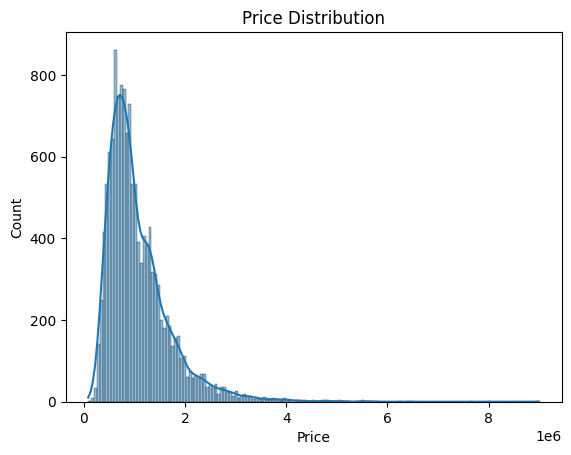

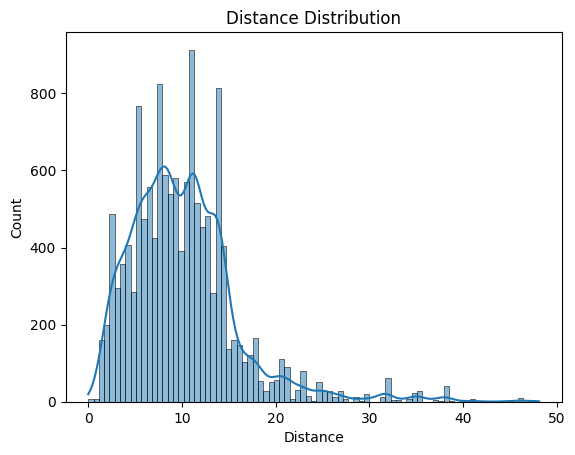

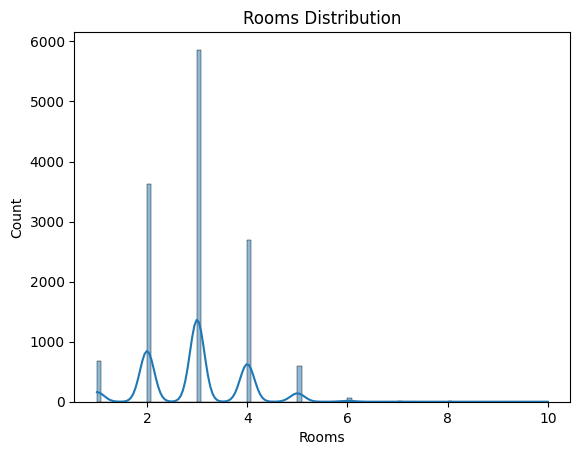

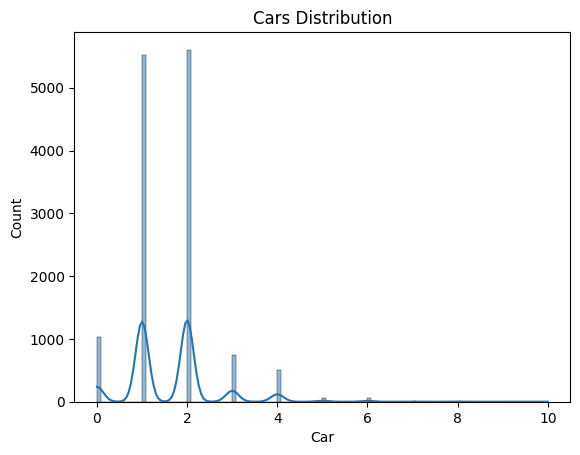

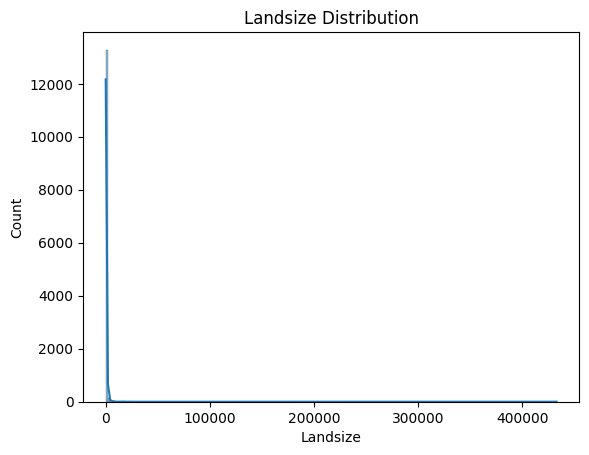

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

sns.histplot(df["Distance"], kde=True)
plt.title("Distance Distribution")
plt.show()

sns.histplot(df["Rooms"], kde=True)
plt.title("Rooms Distribution") 
plt.show()

sns.histplot(df["Car"], kde=True)
plt.title("Cars Distribution")  
plt.show()

sns.histplot(df["Landsize"], kde=True)
plt.title("Landsize Distribution")
plt.show()


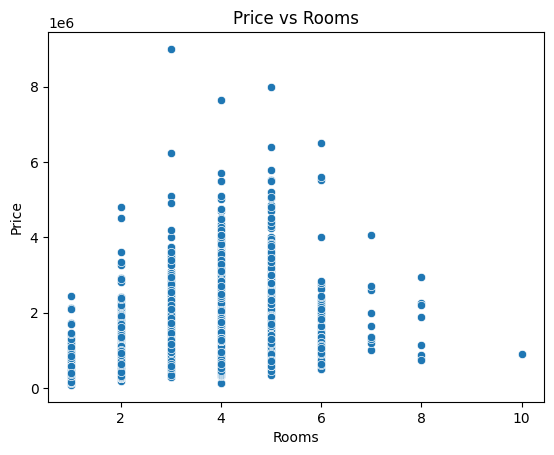

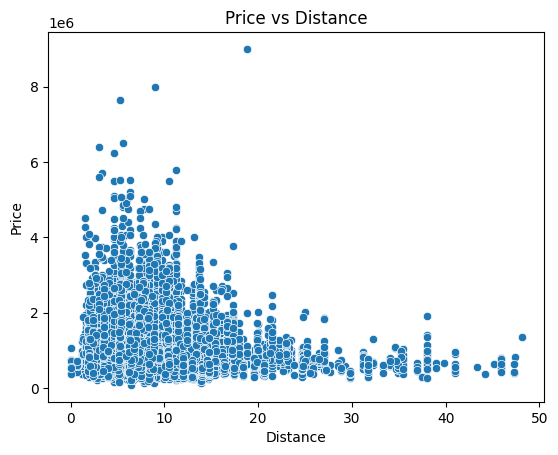

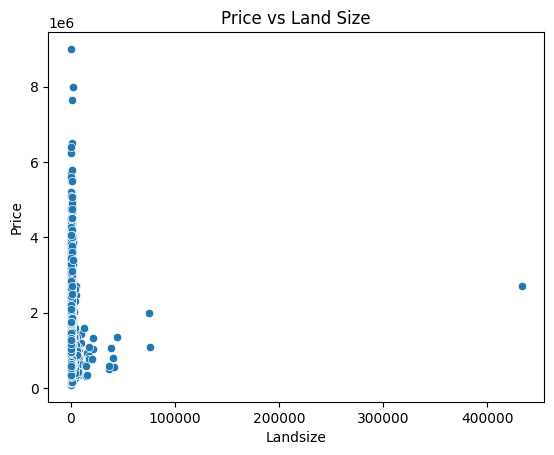

In [3]:
sns.scatterplot(x="Rooms", y="Price", data=df)
plt.title("Price vs Rooms")
plt.show()

sns.scatterplot(x="Distance", y="Price", data=df)  
plt.title("Price vs Distance")
plt.show()

sns.scatterplot(x="Landsize", y="Price", data=df)
plt.title("Price vs Land Size")
plt.show()

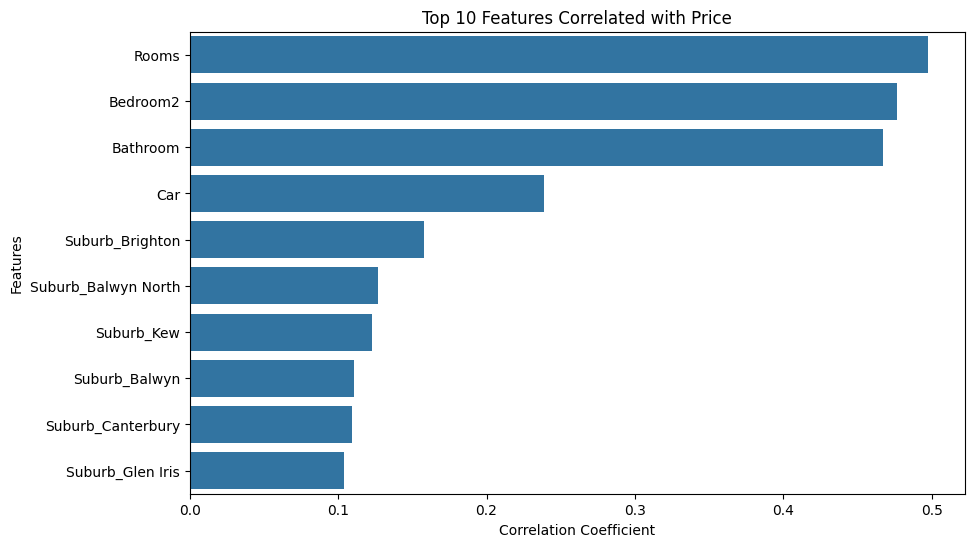

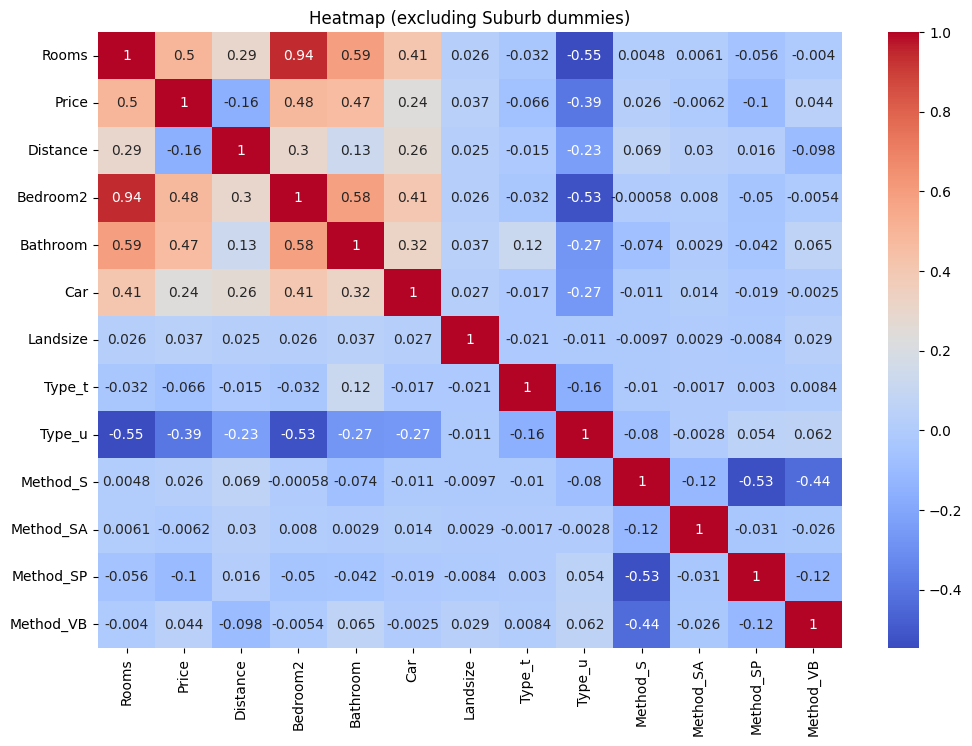

In [4]:
corr = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

top_corr = corr[1:11]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 Features Correlated with Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

filtered_cols = [col for col in df.columns if col.startswith('Suburb_') == False]
plt.figure(figsize=(12, 8))
sns.heatmap(df[filtered_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap (excluding Suburb dummies)")
plt.show()

MAE: 239889.089475779
RMSE: 127148445317.64314
R^2: 0.6720801680377009


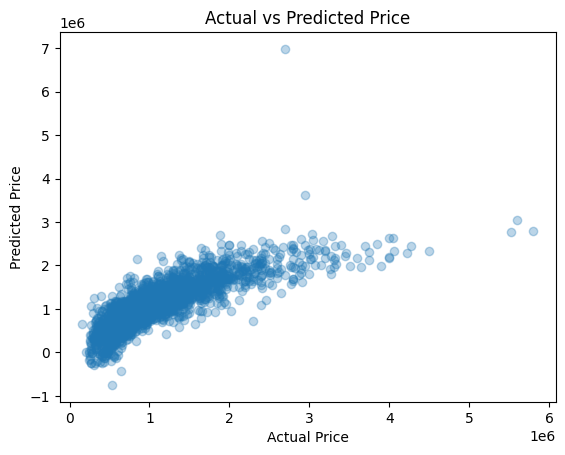

In [5]:
X = df.drop(columns=["Price"])
y = df["Price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

MAE: 192772.05644830773
RMSE: 307312.591246598
R²: 0.7564336221573648


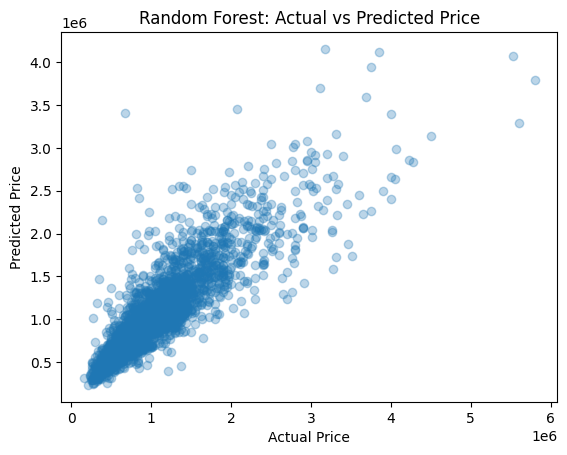

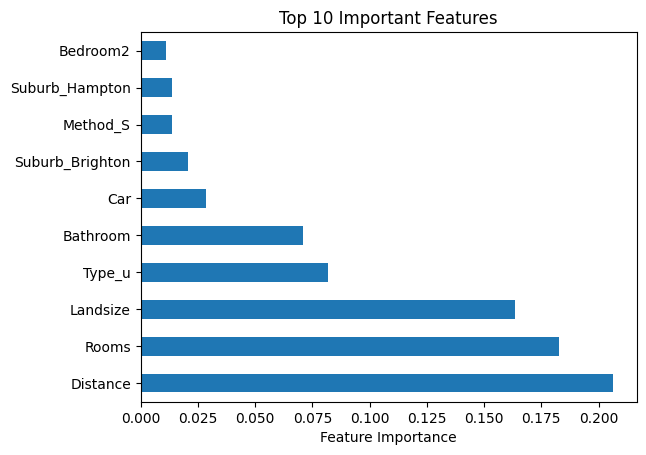

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Price")
plt.show()

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_best = best_rf.predict(X_test)

print("Tuned MAE:", mean_absolute_error(y_test, y_pred_best))
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Tuned R²:", r2_score(y_test, y_pred_best))

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Tuned MAE: 191710.55399838628
Tuned RMSE: 305004.6338576998
Tuned R²: 0.7600783146442252


In [9]:
import pickle

with open("model_rf.pkl", "wb") as f:
    pickle.dump({
        'model': best_rf,
        'columns': X.columns.tolist()
    }, f)